190539T- Sajeepan Excercise -07

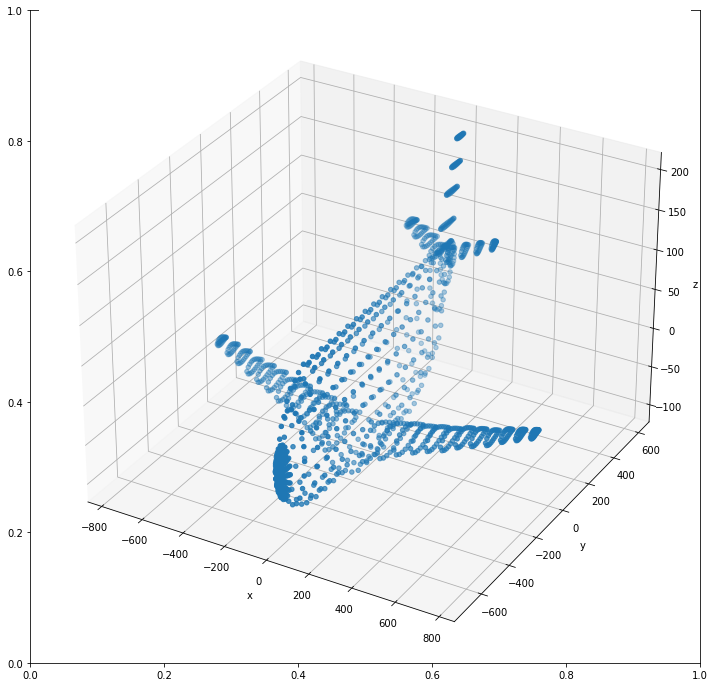

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData ,PlyElement
from mpl_toolkits.mplot3d import Axes3D

pcd = PlyData.read('airplane.ply')
assert pcd is not None
points=np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)  

fig, ax =plt.subplots(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

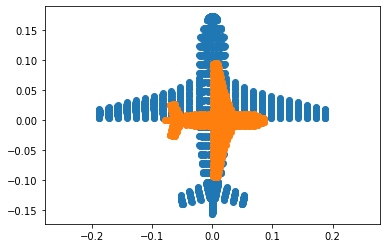

In [3]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)

R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
p1=K @ np.concatenate((R,t),axis=1)


R=np.array([[0,1,0],[1,0,0],[0,0,1]])
K=np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
p2=K @ np.concatenate((R,t),axis=1)



X1 =p1 @ X
X2 =p2 @ X
X1=X1/X1[2,:]
X2=X2/X2[2,:]
fig, ax =plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()

item 1 area in pixels= 59143
item 1 area in pixels= 2318.642172
item 2 area in pixels= 59211
item 2 area in pixels= 2321.3080440000003


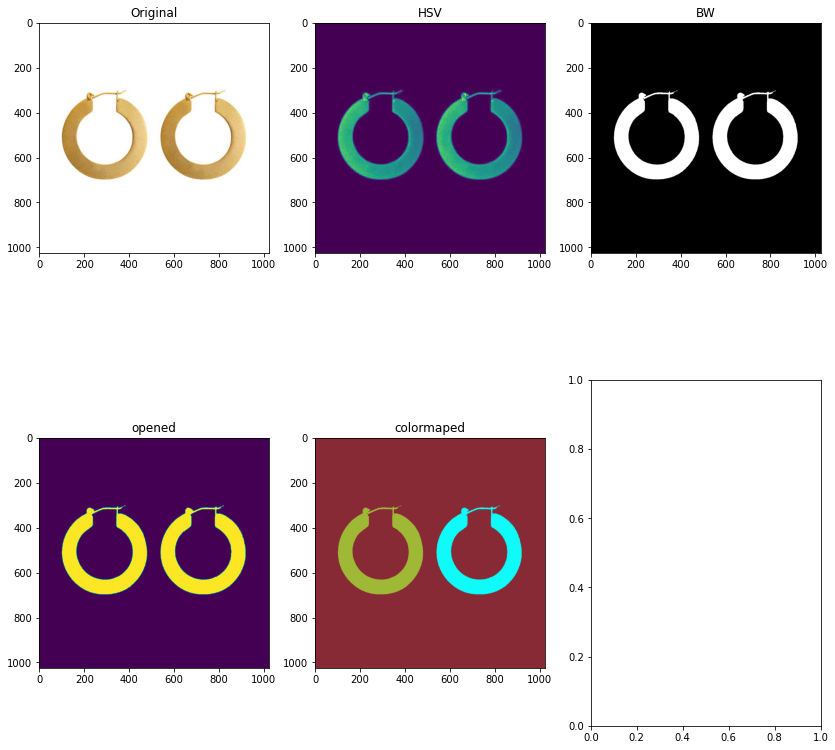

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im=cv.imread(r'earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv=cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w=5
kernel=np.ones((w,w),np.uint8)
opened=cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval,labels,stats,centroids=cv.connectedComponentsWithStats(bw)
colormaped=cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z=720
f=8
for i,s in enumerate(stats):
  if i !=0:
    print("item",i,'area in pixels=',s[4] )
    print("item",i,'area in pixels=',s[4]*(2.2e-3)**2*(z**2)/(f*f))



fig,ax = plt.subplots(2,3,figsize=(14,14))
ax[0,0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original')
ax[0,1].imshow(hsv[:,:,1])
ax[0,1].set_title('HSV')
ax[0,2].imshow(bw,cmap='gray')
ax[0,2].set_title('BW')
ax[1,0].imshow(opened)
ax[1,0].set_title('opened')
ax[1,1].imshow(colormaped)
ax[1,1].set_title('colormaped')
plt.show()